In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Trening skup

In [23]:
data = pd.read_json('data/train.json')
data.head()

,image,question,answers,answer_type,answerable
1616,VizWiz_train_00001616.jpg,What is it?,"[{'answer_confidence': 'yes', 'answer': 'rug'}...",other,1
11910,VizWiz_train_00011910.jpg,WHAT DO YOU SEE?,"[{'answer_confidence': 'maybe', 'answer': 'leg...",other,1
13392,VizWiz_train_00013392.jpg,What is this?,"[{'answer_confidence': 'no', 'answer': 'pendan...",other,1
7274,VizWiz_train_00007274.jpg,What do I see,"[{'answer': 'toilet paper', 'answer_confidence...",other,1
15488,VizWiz_train_00015488.jpg,What color are these socks?,"[{'answer_confidence': 'yes', 'answer': 'black...",other,1


In [24]:
num = data[data.answer_type == 'number'].count()[0]
yn = data[data.answer_type == 'yes/no'].count()[0]
other = data[data.answer_type == 'other'].count()[0]
u = data[data.answer_type == 'unanswerable'].count()[0]

print('Number - ', num)
print('Yes/No - ', yn)
print('Other - ', other)
print('Unanswerable - ', u)

Number -  44
Yes/No -  445
Other -  5110
Unanswerable -  15


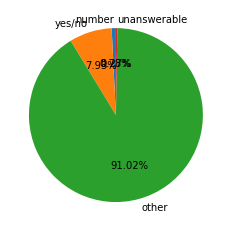

In [25]:
ans_type_count = np.array([num, yn, other, u])
labels = ["number", "yes/no", "other", "unanswerable"]

plt.pie(ans_type_count, labels=labels, startangle=90, autopct='%1.2f%%')
plt.show()

### Ima malo unanswerable pitanja -> ne moramo ih uklanjati

mozda ih staviti da pripadaju nekoj nultoj klasi koja je indikator toga da nema odgovora ili ih samo izbaciti

argument da ostanu - bolje da kazemo da ne znamo odgovor nego da damo neispravnu predikciju

In [26]:
for answers in data[data.answer_type == 'number'].answers:
    for answer in answers:
        print(answer['answer'])
    print('------------------')

1
1
1
1
1
1
1
1
1
1
------------------
1
1
1
thumb
1 thumb
1 thumb
1
1
1
1
------------------
3
ewfwefr
3
3
3
3
3
3
3
3
------------------
east
east
80
80
unsuitable
right
80
unsuitable
unanswerable
45
------------------
4
4
4
4
4
4
4
4
4
4
------------------
15
14
16
14
unanswerable
16
15
14
15
15
------------------
3
unanswerable
3
3
3
3
3
3
3
3
------------------
10000 yuan
1000
10
10000
unanswerable
10000
10000
unanswerable
10000
10000 yen
------------------
2
unanswerable
3
3
3
3
3
unsuitable
unanswerable
3
------------------
69
69
69 no other info available in image
69
69
number s auto on temperature
69
69 no
69
69 degrees
------------------
12
10
unsuitable
12
unanswerable
2
8
10
10
10
------------------
0
0
0
0
0
0
0
0
0
0
------------------
69
unsuitable
69
i dont know
69
unanswerable
69
69 degrees
69.0
69.0
------------------
4
4 2 purple 2 red
4
4
2 pairs
4
4
4
4
4
------------------
5
5
5
5
5
4
5
5
5
5
------------------
72
72
72
72
72
72
72
left button heat middle button f

### trebalo bi da se sva pitanja number tipa mogu svesti na neku cifru (nema brojeva koji su zapisani recima)

In [27]:
for answers in data[data.answer_type == 'yes/no'].answers:
    for answer in answers:
        print(answer['answer'])
    print('------------------')

no
no
no
no
no
unsuitable
no
no
no
no
------------------
unsuitable
yes
no
no
unanswerable
yes
unanswerable
no
yes
unanswerable
------------------
no
blurry
no
unanswerable
unsuitable
unanswerable
unsuitable
no image blurry
no
no
------------------
no
no
no
no
no
no
no
nightstand cutoff wall keyboard visible
no
no
------------------
yes
unanswerable
no
ask
unanswerable
unanswerable
no
no
unanswerable
no
------------------
no
unanswerable
no
no
unsuitable
no
no
no
no
no
------------------
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
------------------
no
unsuitable
no
unsuitable
yes
unanswerable
no
no not
no
no handle
------------------
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
------------------
yes
yes
yes
yes
no
unanswerable
no
yes
no no
yes
------------------
move slightly right about 3 inches
yes
yes
yes
yes
yes
yes
yes
yes
unanswerable
------------------
outfit
yes
yes
yes
yes
yes
yes
yes
yes
no
------------------
no
yes
no
no
no
no
yes very light lavender
unanswerable
ergaer
yes
-------

### ima suma ali cini mi se da se sve moze svesti na yes ili no